In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
train1 = pd.read_excel("../../中银微贷款/微贷款1月.xlsx")
train2 = pd.read_excel("../../中银微贷款/微贷款2月.xlsx")
train3 = pd.read_excel("../../中银微贷款/微贷款3月.xlsx")
train4 = pd.read_excel("../../中银微贷款/微贷款4月.xlsx")
train5 = pd.read_excel("../../中银微贷款/微贷款5月.xlsx")

In [7]:
len(train1)

16120

In [7]:
#train = train1.append(train2).append(train3).append(train4).append(train5)
print(len(train))
print(len(train[train['逾期阶段']>=4]))
print(len(train[train['flag']==1]))
print(len(train[(train['逾期阶段']>=4)&(train['flag']==1)]))

144561
67344
2615
442


In [1]:
import xgboost as xgb

model=xgb.Booster()

model.load_model('1&2&3&4data.model')

In [59]:
def evaluation(train1):#估计预测覆盖率
    preds = model.predict(xgb.DMatrix(train1.drop(['批次','证件号码','消费金融账号','flag','交易金额'],axis=1)))   
    median=pd.DataFrame(preds).describe()[5:6].values.take(0)
    train1['preds'] = pd.DataFrame(preds)
    contain = len(train1[(train1['preds']>=median)&(train1['flag']==1)])
    total = len(train1[train1['flag']==1])
    print("覆盖："+str(contain)+"\t总计："+str(total)+'\t覆盖率：'+str(contain/total)+'\t回款率：'+str(contain/len(train1)))
    train1=train1.drop(['preds'],axis=1)

In [60]:
#train1=train1.drop(['preds'],axis=1)
for i in range(0,5,1):
    evaluation(li[i])
    li[i]=li[i].drop(['preds'],axis=1)

覆盖：207	总计：249	覆盖率：0.8313253012048193	回款率：0.012841191066997519
覆盖：494	总计：614	覆盖率：0.8045602605863192	回款率：0.015344474125613468
覆盖：754	总计：881	覆盖率：0.8558456299659478	回款率：0.019211169995923358
覆盖：455	总计：527	覆盖率：0.8633776091081594	回款率：0.01567776169802219
覆盖：276	总计：344	覆盖率：0.8023255813953488	回款率：0.009865246452443079


In [74]:
sum = 0 
for i in range(0,5,1):
    evaluation(li[i])
    li[i]=li[i].drop(['preds'],axis=1)
    sum+=len(li[i])
sum

覆盖：208	总计：249	覆盖率：0.8353413654618473	回款率：0.012903225806451613
覆盖：490	总计：614	覆盖率：0.7980456026058632	回款率：0.015220227371559918
覆盖：758	总计：881	覆盖率：0.8603859250851306	回款率：0.01931308601712189
覆盖：460	总计：527	覆盖率：0.872865275142315	回款率：0.015850044793604853
覆盖：278	总计：344	覆盖率：0.8081395348837209	回款率：0.009936733745576723


144561

In [47]:
li = list()
li.append(train1)
li.append(train2)
li.append(train3)
li.append(train4)
li.append(train5)

In [6]:
#标签修正
#将正样本中的负样本剔除
def fixflag(train2):
    print(len(train2[train2['flag']==1]))
    false = train2[train2['交易金额']<0.1*train2['当前欠款合计']]
    false['flag'] = 0
    train2 = pd.merge(train2.drop(['flag'],axis=1),false[['消费金融账号','flag']],on='消费金融账号',how='left')
    train2 = train2.fillna(1)
    print(len(train2[train2['flag']==1]))
    return train2
train2=fixflag(train2)

899
614


c:\python35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
train2[train2['交易金额']>=0.1*train2['当前欠款合计']]

,证件号码,性别,婚姻状况,教育程度,单位名称,联系人与客户关系,第二联系人与客户关系,首逾标识,逾期阶段,逾期天数,逾期次数,累计逾期天数,最大逾期天数,解除逾期所需偿还金额,当前欠款合计,现贷余额,当前剩余应缴利息,当期以前未偿还利息合计,当前剩余应缴滞纳费,当期以前未偿还滞纳费合计,放贷金额,年利率,日利率,分期期数,消费金融账号,运营商for本人,运营商for家人,运营商for同事,年龄,农村,户籍等级,住宅等级,单位等级,中银微贷款,新易贷-微贷款-乐贷款,新易贷-微贷款-摩尔龙,新易贷-微贷款-一点即用,新易贷-微贷款-友圈贷,新易贷-微贷款-小牛速贷,新易贷-微贷款-京东金融,新易贷-微贷款-微易贷,商户地址,开户动用日期差,开户动用月数差,首逾动用日期差,首逾动用月数差,最近逾期距首逾日期差,最近逾期距首逾月数差,批次,交易金额,flag
4,441381199507193533,0,0,1,1,3,0,1,2,43,1,43,43,921.80,1285.56,1000.00,10.78,59.78,60.0,155.00,1000,357.7,1.0,3,6010038245782,0,0,0,0,1,2,2,2,0,1,0,0,0,0,0,0,4,0,0,30,1,0,0,2,1389.28,1.0
20,420982199101202326,1,0,1,1,3,0,0,2,55,2,56,55,7618.00,11373.20,10000.00,225.40,597.80,240.0,310.00,30000,357.7,1.0,3,6010031978556,0,0,1,3,2,1,3,3,0,1,0,0,0,0,0,0,4,1,0,30,1,42,1,2,11612.80,1.0
99,340123199509235793,0,0,1,1,3,0,5,2,33,2,37,33,352.10,880.90,690.48,0.41,25.01,10.0,155.00,1000,219.0,0.6,3,6010028588449,0,0,2,0,2,2,2,2,0,1,0,0,0,0,0,0,4,0,0,62,2,91,3,2,382.10,1.0
170,441423199310023620,1,0,1,1,3,0,1,2,50,2,57,50,956.55,963.93,681.54,7.38,25.01,95.0,155.00,2000,219.0,0.6,3,6010030962172,0,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,4,1,0,30,1,61,2,2,990.98,1.0
176,530111197212130019,0,1,1,0,3,1,2,2,41,4,69,41,896.14,1247.00,1000.00,5.40,36.60,50.0,155.00,2000,219.0,0.6,3,6010028915820,0,0,0,1,2,2,2,2,0,1,0,0,0,0,0,0,4,0,0,31,1,105,3,2,976.14,1.0
194,421023197502217919,0,1,1,0,-1,-1,2,2,32,1,32,32,1816.74,7990.91,7395.63,0.00,275.28,10.0,310.00,8000,219.0,0.6,3,6010035990055,0,-1,-1,1,1,1,1,1,0,1,0,0,0,0,0,0,4,0,0,61,2,0,0,2,1976.74,1.0
258,612430198304160014,0,1,1,0,3,0,4,2,47,1,47,47,5084.30,7455.90,6681.14,60.15,244.61,160.0,310.00,13000,219.0,0.6,3,6010029230136,0,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,4,0,0,122,4,0,0,2,7778.13,1.0
324,440803199004290320,1,0,1,1,-1,-1,2,2,37,1,37,37,3361.38,14980.59,13875.81,41.65,508.13,90.0,465.00,15000,219.0,0.6,3,6010035089030,1,0,-1,3,2,1,1,1,0,0,0,0,0,0,0,0,4,2,0,61,2,0,0,2,3436.38,1.0
353,320113199701292011,0,0,1,1,3,0,0,2,55,1,55,55,2348.44,3426.20,3000.00,41.40,109.80,120.0,155.00,6000,219.0,0.6,3,6010029203513,0,0,0,0,1,3,0,0,0,1,0,0,0,0,0,0,4,1,0,114,3,0,0,2,2373.44,1.0
364,450923198910212015,0,0,1,0,3,1,2,2,31,1,31,31,1790.38,14527.16,13809.62,124.20,128.34,465.0,0.00,15000,109.5,0.3,3,6010036181902,0,1,0,3,1,0,0,0,0,1,0,0,0,0,0,0,4,0,0,61,2,0,0,2,3340.76,1.0


In [73]:
test = pd.read_excel('../../中银微贷款/微贷款6月无标签.xlsx')

In [75]:
preds = model.predict(xgb.DMatrix(test.drop(['批次','证件号码','消费金融账号'],axis=1)))

In [83]:
pd.DataFrame(preds+0.52).to_excel('6preds.xlsx')

In [82]:
test=pd.read_excel('../../中银微贷款/微贷款3月14832无标签.xlsx')
test['批次']=3

In [46]:
#train = train.drop(['批次','证件号码','交易金额','消费金融账号'],axis=1)
import matplotlib.pylab as plt
target = 'flag'
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['flag'],eval_metric='auc')

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['flag'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['flag'], dtrain_predprob))
    print(cvresult)
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [47]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional     scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in ['flag']]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)


Model Report
Accuracy : 0.9846
AUC Score (Train): 0.852569
    test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0        0.679110      0.039839        0.686503       0.011466
1        0.681353      0.038872        0.694450       0.011489
2        0.681915      0.041445        0.697490       0.011206
3        0.682253      0.042515        0.700478       0.010192
4        0.684408      0.045768        0.704435       0.011460
5        0.689478      0.049382        0.711645       0.009056
6        0.689211      0.048440        0.712878       0.009370
7        0.689882      0.048661        0.717179       0.011083
8        0.693673      0.046246        0.728935       0.025393
9        0.693283      0.046163        0.730617       0.026018
10       0.696192      0.042182        0.733307       0.024938
11       0.702845      0.040645        0.748494       0.023859
12       0.703005      0.042874        0.752215       0.023255
13       0.718407      0.043127        0.762525       0.02

c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
param_test1 = {  
    'max_depth':list(range(3,6,1)),  
    'min_child_weight':list(range(1,10,2))  
}  
gsearch1 = GridSearchCV(estimator=XGBClassifier( learning_rate =0.1, n_estimators=37, max_depth=5,  
min_child_weight=1, gamma=0, subsample=0.8,colsample_bytree=0.8,  
objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27),  
                        param_grid=param_test1,scoring='roc_auc',iid=False,cv=5)  
gsearch1.fit(train[predictors],train[target])  
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_  

([mean: 0.70381, std: 0.09261, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.69038, std: 0.10306, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.69251, std: 0.10126, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.68918, std: 0.09986, params: {'max_depth': 3, 'min_child_weight': 7},
  mean: 0.68651, std: 0.10078, params: {'max_depth': 3, 'min_child_weight': 9},
  mean: 0.63151, std: 0.10859, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.65120, std: 0.08570, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.66778, std: 0.08420, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.68583, std: 0.08539, params: {'max_depth': 4, 'min_child_weight': 7},
  mean: 0.68705, std: 0.09193, params: {'max_depth': 4, 'min_child_weight': 9},
  mean: 0.61400, std: 0.13526, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.61148, std: 0.13909, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.62922, std: 0.11182, params: {

In [55]:
param_test2b = {
 'min_child_weight':[1,2,3]
 }
gsearch2b = GridSearchCV(estimator = XGBClassifier(     learning_rate=0.1, n_estimators=37, max_depth=3,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2b.fit(train[predictors],train[target])

modelfit(gsearch2b.best_estimator_, train, predictors)

gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_


Model Report
Accuracy : 0.9846
AUC Score (Train): 0.792421
    test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0        0.679007      0.039861        0.685999       0.011009
1        0.681194      0.039045        0.692971       0.010546
2        0.681946      0.041630        0.695601       0.009899
3        0.683062      0.043433        0.697020       0.010739
4        0.686141      0.046326        0.699395       0.011705
5        0.691632      0.051474        0.705314       0.010346
6        0.690784      0.050871        0.705974       0.010279
7        0.690739      0.051017        0.707673       0.010589
8        0.694201      0.049393        0.718687       0.024276
9        0.694076      0.049275        0.720423       0.025187
10       0.696848      0.045654        0.723968       0.024090
11       0.701267      0.045635        0.733292       0.022405
12       0.701775      0.045905        0.734724       0.023224
13       0.707316      0.044214        0.737556       0.02

c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


([mean: 0.70381, std: 0.09261, params: {'min_child_weight': 1},
  mean: 0.68837, std: 0.10051, params: {'min_child_weight': 2},
  mean: 0.69038, std: 0.10306, params: {'min_child_weight': 3}],
 {'min_child_weight': 1},
 0.703809878175166)

In [57]:
param_test3 = {  
    'gamma': [i / 10.0 for i in range(0, 5)]  
}  
gsearch3 = GridSearchCV(  
    estimator=XGBClassifier(learning_rate=0.1, n_estimators=37, max_depth=3, min_child_weight=1, gamma=0,  
                            subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4,  
                            scale_pos_weight=1, seed=27), param_grid=param_test3, scoring='roc_auc', n_jobs=4,  
    iid=False, cv=5)  
gsearch3.fit(train[predictors],train[target])  
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_  

([mean: 0.70381, std: 0.09261, params: {'gamma': 0.0},
  mean: 0.70395, std: 0.09293, params: {'gamma': 0.1},
  mean: 0.70258, std: 0.09395, params: {'gamma': 0.2},
  mean: 0.70307, std: 0.09290, params: {'gamma': 0.3},
  mean: 0.70329, std: 0.09365, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.7039535809927621)

In [58]:
param_test4 = {  
    'subsample': [i / 10.0 for i in range(6, 10)],  
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]  
}  
  
gsearch4 = GridSearchCV(  
    estimator=XGBClassifier(learning_rate=0.1, n_estimators=37, max_depth=3, min_child_weight=2, gamma=0.1,  
                            subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4,  
                            scale_pos_weight=1, seed=27), param_grid=param_test4, scoring='roc_auc', n_jobs=4,  
    iid=False, cv=5)  
  
gsearch4.fit(train[predictors],train[target])  
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_  

([mean: 0.69188, std: 0.09796, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.69209, std: 0.08972, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.70230, std: 0.09091, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.70266, std: 0.08486, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.69486, std: 0.09391, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.69607, std: 0.08770, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.68752, std: 0.10301, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.69448, std: 0.08090, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.68815, std: 0.10094, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.69875, std: 0.08118, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.69012, std: 0.09841, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.68964, std: 0.10588, params: {'subsample': 0.9, 'colsample_bytree'

In [62]:
param_test6 = {  
 'reg_alpha':[7,8,9,10,11]  
}  
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=37, max_depth=3, min_child_weight=1, gamma=0.1, subsample=0.7, colsample_bytree=0.9, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)  
  
gsearch6.fit(train[predictors],train[target])  
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_  

([mean: 0.70213, std: 0.09201, params: {'reg_alpha': 7},
  mean: 0.70434, std: 0.08461, params: {'reg_alpha': 8},
  mean: 0.70380, std: 0.08432, params: {'reg_alpha': 9},
  mean: 0.69908, std: 0.08851, params: {'reg_alpha': 10},
  mean: 0.70254, std: 0.08208, params: {'reg_alpha': 11}],
 {'reg_alpha': 8},
 0.7043384847904004)

In [63]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=3,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.7,
 colsample_bytree=0.9,
 reg_alpha=8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)

c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.9846
AUC Score (Train): 0.766608
     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.501597      0.003592        0.505283       0.002803
1         0.501534      0.003631        0.506278       0.004037
2         0.501534      0.003631        0.506278       0.004037
3         0.501534      0.003631        0.506278       0.004037
4         0.501441      0.003445        0.507270       0.004169
5         0.501441      0.003445        0.507270       0.004169
6         0.501441      0.003445        0.508212       0.004557
7         0.501441      0.003445        0.508212       0.004557
8         0.501441      0.003445        0.508212       0.004557
9         0.501441      0.003445        0.508212       0.004557
10        0.501189      0.003641        0.509658       0.006447
11        0.501189      0.003641        0.509659       0.006447
12        0.501189      0.003641        0.509659       0.006447
13        0.501189      0.003641        0.50

In [38]:
flag = 0
a = ['中银微贷款', '住宅等级', '农村', '分期期数', '单位名称', '单位等级', '商户地址', '婚姻状况', '年利率', '年龄', '开户动用日期差', '开户动用月数差', '当前剩余应缴利息', '当前剩余应缴滞纳费', '当前欠款合计', '当期以前未偿还利息合计', '当期以前未偿还滞纳费合计', '性别', '户籍等级', '放贷金额', '教育程度', '新易贷-微贷款-一点即用', '新易贷-微贷款-乐贷款', '新易贷-微贷款-京东金融', '新易贷-微贷款-友圈贷', '新易贷-微贷款-小牛速贷', '新易贷-微贷款-微易贷', '新易贷-微贷款-摩尔龙', '日利率', '最大逾期天数', '最近逾期距首逾日期差', '最近逾期距首逾月数差', '现贷余额', '第二联系人与客户关系', '累计逾期天数', '联系人与客户关系', '解除逾期所需偿还金额', '运营商for同事', '运营商for家人', '运营商for本人', '逾期天数', '逾期次数', '逾期阶段', '首逾动用日期差', '首逾动用月数差', '首逾标识']
b = ['性别', '婚姻状况', '教育程度', '单位名称', '联系人与客户关系', '第二联系人与客户关系', '首逾标识', '逾期阶段', '逾期天数', '逾期次数', '累计逾期天数', '最大逾期天数', '解除逾期所需偿还金额', '当前欠款合计', '现贷余额', '当前剩余应缴利息', '当期以前未偿还利息合计', '当前剩余应缴滞纳费', '当期以前未偿还滞纳费合计', '放贷金额', '年利率', '日利率', '分期期数', '运营商for本人', '运营商for家人', '运营商for同事', '年龄', '农村', '户籍等级', '住宅等级', '单位等级', '中银微贷款', '新易贷-微贷款-乐贷款', '新易贷-微贷款-摩尔龙', '新易贷-微贷款-一点即用', '新易贷-微贷款-友圈贷', '新易贷-微贷款-小牛速贷', '新易贷-微贷款-京东金融', '新易贷-微贷款-微易贷', '商户地址', '开户动用日期差', '开户动用月数差', '首逾动用日期差', '首逾动用月数差', '最近逾期距首逾日期差', '最近逾期距首逾月数差']
print(len(a))
print(len(b))
for i in b:#test.columns.values:
    for j in a:#train.columns.values:
        if (i==j):
            flag = 1
    if(flag==0):
        print(i)
    else:
        flag=0
        #print(i+"匹配")
    
    

46
46


In [2]:
train2 = train[train['批次']!=201711].drop(['批次','证件号码','交易金额'],axis=1)
test = train[train['批次']==201711].drop(['批次','证件号码','交易金额'],axis=1)

In [3]:
print(len(train2[train2['flag']!=0]))

6548


In [4]:
false_samples = train2[train2['flag']==0].sample(n= 100000,random_state=1,axis=0)
len(false_samples)

100000

In [6]:
import math
def createweight(lamb ,t):
    N = list()
    N0 = 1
    for i in range(t):
        N.append(N0 * math.exp(-lamb * i))
    return N
    

In [13]:
createweight(0.07,4)

[1.0, 0.9323938199059483, 0.8693582353988059, 0.8105842459701871]

In [111]:
trainlist = list()
trainlist.append(train1)
trainlist.append(train2)

In [112]:
trainlist.append(train3)
#trainlist.append(train4)
n = createweight(0.07,4)
for i in range(len(trainlist)):
    trainlist[i]['weight'] = n[len(trainlist)-1-i]

In [114]:
train1

,证件号码,性别,婚姻状况,教育程度,单位名称,联系人与客户关系,第二联系人与客户关系,首逾标识,逾期阶段,逾期天数,逾期次数,累计逾期天数,最大逾期天数,解除逾期所需偿还金额,当前欠款合计,现贷余额,当前剩余应缴利息,当期以前未偿还利息合计,当前剩余应缴滞纳费,当期以前未偿还滞纳费合计,放贷金额,年利率,日利率,分期期数,消费金融账号,运营商for本人,运营商for家人,运营商for同事,年龄,农村,户籍等级,住宅等级,单位等级,中银微贷款,新易贷-微贷款-乐贷款,新易贷-微贷款-摩尔龙,新易贷-微贷款-一点即用,新易贷-微贷款-友圈贷,新易贷-微贷款-小牛速贷,新易贷-微贷款-易家贷,新易贷-微贷款-京东金融,新易贷-微贷款-微易贷,新易贷-微贷款-中银贷,新易贷-微贷款-还呗中银贷,信用金,商户地址,开户动用日期差,开户动用月数差,首逾动用日期差,首逾动用月数差,最近逾期距首逾日期差,最近逾期距首逾月数差,批次,交易金额,flag,产品,weight
0,51010819860204061X,0,1,1,1,3,1,4,3,72,5,129,72,1414.60,1420.60,1000.00,6.00,54.60,55.0,305.00,8000,219.0,0.6,2,6010013837607,2,2,0,3,2,3,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,31,1,327,10,1,0.00,0,0.017749,0.869358
1,362324198911010013,0,0,1,1,3,0,10,4,94,3,97,94,2618.80,2618.80,2000.00,2.40,146.40,15.0,455.00,24000,219.0,0.6,2,6010014020736,0,0,0,3,2,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,1,303,10,1,0.00,0,0.017749,0.869358
2,210402197903183836,0,1,1,1,3,1,8,6,154,1,154,154,1880.40,1880.40,1000.00,0.00,110.40,5.0,765.00,7000,219.0,0.6,2,6010016212157,1,1,0,1,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243,8,0,0,1,0.00,0,0.017749,0.869358
3,342829197012242014,0,1,1,1,3,1,1,7,210,4,219,210,2194.00,2194.00,1000.00,15.60,128.40,135.0,915.00,5000,219.0,0.6,2,6010015922373,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10,0,31,1,149,4,1,0.00,0,0.017749,0.869358
4,350521199202021513,0,0,1,1,3,1,8,5,125,3,131,125,2811.00,2811.00,2000.00,2.40,183.60,15.0,610.00,16000,219.0,0.6,2,6010016465528,0,0,0,3,0,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,201,6,67,2,1,0.00,0,0.017749,0.869358
5,510824199007175416,0,0,1,1,3,1,9,4,96,1,96,96,2631.20,2631.20,2000.00,4.80,146.40,25.0,455.00,14000,219.0,0.6,2,6010016319472,0,0,0,3,1,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,4,4,0,296,9,0,0,1,0.00,0,0.017749,0.869358
6,441623199606062435,0,0,1,1,3,1,11,2,35,2,36,35,529.94,1214.00,1000.00,2.40,36.60,25.0,150.00,10500,219.0,0.6,2,6010016395321,0,0,1,0,1,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,4,22,0,304,10,34,1,1,0.00,0,0.017749,0.869358
7,622326198201043749,1,1,1,0,3,0,5,8,217,2,218,217,3380.20,3380.20,2000.00,2.40,292.80,15.0,1070.00,10000,219.0,0.6,2,6010017659574,2,1,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,3,59,1,1,0.00,0,0.017749,0.869358
8,510722199202030353,0,0,1,1,3,1,6,6,162,1,163,163,3003.20,3003.20,2000.00,10.80,182.40,50.0,760.00,14000,219.0,0.6,2,6010017811441,0,0,0,3,1,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,7,0,0,1,0.00,0,0.017749,0.869358
9,360734198808202431,0,0,1,1,3,1,6,4,100,5,138,100,2656.00,2656.00,2000.00,9.60,146.40,45.0,455.00,10000,219.0,0.6,2,6010017806846,1,0,0,3,0,1,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,4,147,4,1,0.00,0,0.017749,0.869358


In [122]:
'''.drop(['批次','证件号码','交易金额','消费金融账号'],axis=1)'''
import xgboost as xgb
from sklearn.cross_validation import train_test_split
train_xy,val = train_test_split(train1.append(train2).append(train3).drop(['批次','证件号码','交易金额','消费金融账号','产品'],axis=1), test_size = 0.3,random_state=10)  

y = train_xy['flag']
w = train_xy['weight']
X = train_xy.drop(['flag','weight'],axis=1)
val_y = val['flag']
val_w = val['weight']
val_X = val.drop(['flag','weight'],axis=1)

#xgb矩阵赋值
xgb_val = xgb.DMatrix(val_X,label=val_y, weight=val_w)
xgb_train = xgb.DMatrix(X, label=y, weight=w)
#xgb_test = xgb.DMatrix(test)
params={
'booster':'gbtree',
'binary':'logistic',
'eval_metric': 'auc',
#'objective': 'multi:softmax', #多分类的问题
#'num_class':2, # 类别数，与 multisoftmax 并用
'gamma':0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
'max_depth':3, # 构建树的深度，越大越容易过拟合
'lambda':2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
'subsample':0.7, # 随机采样训练样本
'colsample_bytree':0.8, # 生成树时进行的列采样
'min_child_weight':8, 
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
'scale_pos_weight':1,
'reg_alpha':8,
'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
'eta': 0.05,#0.007, # 如同学习率
'seed':1000,
#'nthread':7,# cpu 线程数
#'eval_metric': 'auc'
}
plst = list(params.items())
num_rounds = 500 # 迭代次数
watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]

#训练模型并保存
# early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
model = xgb.train(plst, xgb_train, num_rounds, watchlist,early_stopping_rounds=50)

[20:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[0]	train-auc:0.5	val-auc:0.5
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[20:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1]	train-auc:0.5	val-auc:0.5
[20:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2]	train-auc:0.5	val-auc:0.5
[20:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3]	train-auc:0.5	val-auc:0.5
[20:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 2 pruned nodes, max

[42]	train-auc:0.727349	val-auc:0.719883
[20:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[43]	train-auc:0.728458	val-auc:0.721461
[20:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[44]	train-auc:0.729154	val-auc:0.722995
[20:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[45]	train-auc:0.729016	val-auc:0.723394
[20:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 6 pruned nodes, max_depth=2
[46]	train-auc:0.729134	val-auc:0.723659
[20:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[47]	train-auc:0.729057	val-auc:0.723403
[20:

[20:33:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[86]	train-auc:0.746775	val-auc:0.740345
[20:33:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 10 pruned nodes, max_depth=1
[87]	train-auc:0.746763	val-auc:0.74031
[20:33:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[88]	train-auc:0.746966	val-auc:0.740363
[20:33:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[89]	train-auc:0.746771	val-auc:0.740494
[20:33:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[90]	train-auc:0.747001	val-auc:0.740475
[20:33:41] C:\Users\Administrator\Desktop\xg

[128]	train-auc:0.753453	val-auc:0.744544
[20:33:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[129]	train-auc:0.753603	val-auc:0.744611
[20:33:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[130]	train-auc:0.753603	val-auc:0.744611
[20:33:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[131]	train-auc:0.753695	val-auc:0.744593
[20:33:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[132]	train-auc:0.753771	val-auc:0.744527
[20:33:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[133]	train-auc:0.753771	val-auc:0.74

[171]	train-auc:0.755791	val-auc:0.744267
[20:33:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[172]	train-auc:0.75588	val-auc:0.744381
[20:33:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[173]	train-auc:0.755912	val-auc:0.744403
[20:33:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[174]	train-auc:0.755912	val-auc:0.744403
[20:33:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[175]	train-auc:0.755982	val-auc:0.744468
[20:33:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[176]	train-auc:0.756161	val-auc:0.74459

In [123]:
#test
preds=model.predict(xgb.DMatrix(train4.drop(['批次','证件号码','交易金额','消费金融账号','产品','flag','weight'],axis=1)))

In [124]:
#test metrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
p = preds.copy()
count=0
for i in range(len(p)):
    if p[i]>= 0.1:
        p[i]=1
    else:
        p[i]=0
#print(count)
#print(len(train4[train4['flag']==1]))
#print(metrics.precision_score(train5['flag'], p))
#print(metrics.recall_score(train5['flag'], p))
#print(metrics.f1_score(train5['flag'], p))

roc_auc_score(train4['flag'], preds)

0.7736254870773627

In [125]:
# p 50%
testset = train4.copy()
print(pd.DataFrame(preds).describe())

                  0
count  29022.000000
mean       0.016412
std        0.021343
min        0.002937
25%        0.005836
50%        0.008010
75%        0.015281
max        0.254882


In [126]:
testset.insert(0,'preds',pd.DataFrame(preds))
true = testset[testset['flag']==1]
print(len(true))
print(len(true[true['preds']>=0.008010]))

527
451


In [ ]:
Stopping. Best iteration:
[116]	train-auc:0.775246	val-auc:0.742794

In [15]:
model.save_model("1&2&3&4data.model")

In [ ]:
Stopping. Best iteration:
[60]	train-auc:0.762878	val-auc:0.732454
Stopping. Best iteration: min-child:10
[60]	train-auc:0.761479	val-auc:0.73279  
Stopping. Best iteration:  12
[60]	train-auc:0.761841	val-auc:0.732915
Stopping. Best iteration:  13
[60]	train-auc:0.760677	val-auc:0.73513
Stopping. Best iteration:  14
[81]	train-auc:0.767555	val-auc:0.739255


In [ ]:
Stopping. Best iteration:'min_child_weight':15, 3
[42]	train-auc:0.769214	val-auc:0.767221
Stopping. Best iteration: 10,4
[52]	train-auc:0.799148	val-auc:0.77433
Stopping. Best iteration: 9 ,4
[52]	train-auc:0.79898	val-auc:0.778171

In [23]:
Stopping. Best iteration:(6w,'eta': 0.1)
[67]	train-auc:0.742743	val-auc:0.726084
Stopping. Best iteration:(10w,'eta': 0.1)
[124]	train-auc:0.74463	val-auc:0.733657
Stopping. Best iteration:(3w,'eta': 0.1)
[176]	train-auc:0.762451	val-auc:0.726942
Stopping. Best iteration:(alll,'eta': 0.1)
[94]	train-auc:0.738897	val-auc:0.72545
Stopping. Best iteration:(8w,'eta': 0.1)
[75]	train-auc:0.739858	val-auc:0.731124
Stopping. Best iteration:(10w,'eta': 0.01)
[1374]	train-auc:0.746723	val-auc:0.73442

29

In [20]:
test

,证件号码,性别,婚姻状况,教育程度,单位名称,联系人与客户关系,第二联系人与客户关系,首逾标识,逾期阶段,逾期天数,逾期次数,累计逾期天数,最大逾期天数,解除逾期所需偿还金额,当前欠款合计,现贷余额,当前剩余应缴利息,当期以前未偿还利息合计,当前剩余应缴滞纳费,当期以前未偿还滞纳费合计,放贷金额,年利率,日利率,分期期数,消费金融账号,运营商for本人,运营商for家人,运营商for同事,年龄,农村,户籍等级,住宅等级,单位等级,中银微贷款,新易贷-微贷款-乐贷款,新易贷-微贷款-摩尔龙,新易贷-微贷款-一点即用,新易贷-微贷款-友圈贷,新易贷-微贷款-小牛速贷,新易贷-微贷款-易家贷,新易贷-微贷款-京东金融,新易贷-微贷款-微易贷,新易贷-微贷款-中银贷,新易贷-微贷款-还呗中银贷,商户地址,开户动用日期差,开户动用月数差,首逾动用日期差,首逾动用月数差,最近逾期距首逾日期差,最近逾期距首逾月数差,批次
0,442000198604025701,1,1,1,0,3,1,1,2,45,2,66,45,3629.37,15575.31,13950.49,177.71,792.11,210.0,445.00,15000,357.7,1.0,3,6010042662241,0,0,0,3,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,4,0,0,31,1,28,0,5
1,620421199108143637,0,0,1,1,3,1,1,2,47,1,47,47,636.38,2380.04,2000.00,29.40,115.64,80.0,155.00,2000,357.7,1.0,3,6010043815657,1,0,0,3,2,0,3,3,0,0,0,0,0,0,0,0,0,0,1,4,17,0,28,0,0,0,5
2,410822198911042020,1,0,1,0,3,1,1,2,58,1,58,58,691.38,2456.60,2000.00,50.96,115.64,135.0,155.00,2000,357.7,1.0,3,6010044464342,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,28,0,0,0,5
3,220203197701171818,0,1,1,1,3,1,2,2,36,1,36,36,1183.48,5117.44,4650.16,18.24,269.04,25.0,155.00,5000,357.7,1.0,3,6010043278312,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4,2,0,59,1,0,0,5
4,320923198601182423,1,1,1,1,3,1,1,2,39,1,39,39,2396.94,11036.80,10000.00,68.60,578.20,80.0,310.00,10000,357.7,1.0,3,6010045775962,0,0,0,3,2,1,3,3,0,0,0,0,0,0,0,0,0,0,1,4,0,0,28,0,0,0,5
5,430426198204093475,0,1,1,1,3,1,1,2,51,1,51,51,656.38,2407.88,2000.00,37.24,115.64,100.0,155.00,2000,357.7,1.0,3,6010044803980,0,1,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,28,0,0,0,5
6,421182199108234539,0,0,1,1,3,1,2,2,43,1,43,43,583.96,1119.00,845.90,9.13,48.97,60.0,155.00,1000,357.7,1.0,3,6010042817795,2,0,1,3,2,0,2,2,0,0,0,0,0,0,0,0,0,0,1,4,0,0,59,1,0,0,5
7,510281198308261756,0,1,1,1,3,1,1,2,60,1,60,60,2606.94,11452.60,10000.00,274.40,578.20,290.0,310.00,10000,357.7,1.0,3,6010044320594,0,1,2,2,2,0,3,3,0,0,0,0,0,0,0,0,0,0,1,4,0,0,28,0,0,0,5
8,411102197706091520,1,1,1,0,3,0,2,2,31,2,32,31,2316.94,10136.13,9270.93,0.00,555.20,10.0,300.00,10000,357.7,1.0,3,6010044132913,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,28,0,31,1,5
9,350104199404154930,0,0,1,1,3,1,2,2,55,1,55,55,716.80,2633.93,2302.35,15.87,40.71,120.0,155.00,2500,109.5,0.3,3,6010041940937,0,1,0,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,4,0,0,59,1,0,0,5


In [17]:
#import numpy as np
#test = test[test['逾期阶段']>=4].reset_index().drop(['index'],axis=1)
#preds = model.predict(xgb.DMatrix(test[['中银微贷款', '住宅等级', '农村', '分期期数', '单位名称', '单位等级', '商户地址', '婚姻状况', '年利率', '年龄', '开户动用日期差', '开户动用月数差', '当前剩余应缴利息', '当前剩余应缴滞纳费', '当前欠款合计', '当期以前未偿还利息合计', '当期以前未偿还滞纳费合计', '性别', '户籍等级', '放贷金额', '教育程度', '新易贷-微贷款-一点即用', '新易贷-微贷款-乐贷款', '新易贷-微贷款-京东金融', '新易贷-微贷款-友圈贷', '新易贷-微贷款-小牛速贷', '新易贷-微贷款-微易贷', '新易贷-微贷款-摩尔龙', '日利率', '最大逾期天数', '最近逾期距首逾日期差', '最近逾期距首逾月数差', '现贷余额', '第二联系人与客户关系', '累计逾期天数', '联系人与客户关系', '解除逾期所需偿还金额', '运营商for同事', '运营商for家人', '运营商for本人', '逾期天数', '逾期次数', '逾期阶段', '首逾动用日期差', '首逾动用月数差', '首逾标识']]))
#pp = test[['flag']]
#pp.insert(1,'preds',pd.DataFrame(preds))
test = pd.read_excel("../../中银微贷款/微贷款5月无标签.xlsx")
preds = model.predict(xgb.DMatrix(test.drop(['批次','证件号码','消费金融账号'],axis=1)))

In [18]:
pd.DataFrame(preds).describe()

,0
count,27977.000000
mean,0.010411
std,0.013481
min,0.001302
25%,0.004412
50%,0.006251
75%,0.010121
max,0.473715


In [23]:
train2[(train2['preds']>=0.009113)&(train2['flag']==1)]
#len(train2[train2['flag']==1])

,preds,证件号码,性别,婚姻状况,教育程度,单位名称,联系人与客户关系,第二联系人与客户关系,首逾标识,逾期阶段,逾期天数,逾期次数,累计逾期天数,最大逾期天数,解除逾期所需偿还金额,当前欠款合计,现贷余额,当前剩余应缴利息,当期以前未偿还利息合计,当前剩余应缴滞纳费,当期以前未偿还滞纳费合计,放贷金额,年利率,日利率,分期期数,消费金融账号,运营商for本人,运营商for家人,运营商for同事,年龄,农村,户籍等级,住宅等级,单位等级,中银微贷款,新易贷-微贷款-乐贷款,新易贷-微贷款-摩尔龙,新易贷-微贷款-一点即用,新易贷-微贷款-友圈贷,新易贷-微贷款-小牛速贷,新易贷-微贷款-京东金融,新易贷-微贷款-微易贷,商户地址,开户动用日期差,开户动用月数差,首逾动用日期差,首逾动用月数差,最近逾期距首逾日期差,最近逾期距首逾月数差,批次,交易金额,flag
0,0.011664,410222198304292017,0,1,1,0,3,0,0,4,93,4,116,93,3149.50,3149.50,2500.00,0.00,184.50,5.0,460.00,7500,219.0,0.6,1,6010026982350,0,0,0,2,0,0,4,4,1,0,0,0,0,0,0,0,0,0,0,30,1,128,4,3,3175.50,1
1,0.009204,513922199112254154,0,0,1,0,3,0,0,4,93,3,107,93,1200.13,1200.13,683.10,0.00,52.03,5.0,460.00,4000,219.0,0.6,1,6010028417440,0,0,1,3,2,0,3,3,1,0,0,0,0,0,0,0,0,0,0,66,2,61,2,3,1205.54,1
9,0.010110,360502199410204616,0,0,1,0,3,0,2,4,91,2,93,91,927.31,927.31,422.95,0.00,49.36,5.0,450.00,500,357.7,1.0,3,6010032460649,0,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,4,0,0,31,1,30,1,3,965.18,1
12,0.009447,622201199108293614,0,0,1,0,3,1,0,4,91,1,91,91,2063.90,2063.90,1500.00,0.00,108.90,5.0,450.00,6000,219.0,0.6,1,6010029059324,2,2,1,3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,110,3,0,0,3,2099.30,1
18,0.010369,510521199608261250,0,0,1,0,3,0,1,4,105,2,127,105,1255.83,1255.83,672.43,4.80,53.60,65.0,460.00,1000,219.0,0.6,3,6010031226507,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,4,0,0,30,1,31,1,3,1288.23,1
25,0.009659,410324199701093911,0,0,1,0,3,1,1,4,91,1,91,91,1377.06,1377.06,897.67,0.00,80.20,5.0,394.19,1000,357.7,1.0,3,6010035871085,0,1,1,0,2,1,1,1,0,1,0,0,0,0,0,0,4,0,0,31,1,0,0,3,1530.19,1
26,0.010859,220524199510153219,0,0,1,0,3,0,1,4,91,1,91,91,1573.58,1573.58,1000.00,0.00,118.58,5.0,450.00,1000,357.7,1.0,3,6010035944076,0,2,0,0,2,0,3,3,0,1,0,0,0,0,0,0,4,0,0,31,1,0,0,3,1615.44,1
33,0.014999,61240119950918803X,0,0,1,1,3,0,3,4,96,5,111,96,1227.05,1227.05,693.53,1.26,52.26,20.0,460.00,2000,219.0,0.6,1,6010027108961,0,0,0,0,1,0,2,2,1,0,0,0,0,0,0,0,0,0,0,30,1,123,4,3,1308.35,1
34,0.011797,440582199009224014,0,0,1,1,3,0,0,4,119,2,146,119,1139.70,1139.70,500.00,7.80,36.90,135.0,460.00,2000,219.0,0.6,1,6010028080746,0,0,1,3,2,1,1,1,1,0,0,0,0,0,0,0,0,14,0,37,1,58,1,3,1213.90,1
41,0.009455,500224199606023890,0,0,1,1,-1,-1,1,4,111,1,111,111,1124.09,1124.09,500.00,8.82,60.27,95.0,460.00,500,357.7,1.0,1,6010033141785,0,-1,-1,0,2,3,0,0,1,0,0,0,0,0,0,0,4,2,0,31,1,0,0,3,1200.95,1


In [36]:
#train2.insert(0,'preds',pd.DataFrame(preds))
train2 = train2.drop(['preds'],axis=1)

In [97]:
len(train2[train2['交易金额']>=0.1*train2['当前欠款合计']])

614

In [19]:
pd.DataFrame(preds+0.45).to_excel('5preds.xlsx',index=False)

In [24]:
result = pp[pp['flag']==1].sort_values(by=['preds'],ascending=False)
print(len(result[result['preds']>=0.026205]))
result

20


,flag,preds
5,1,0.128470
1010,1,0.087127
1380,1,0.064539
1709,1,0.049386
517,1,0.047087
1621,1,0.044037
1982,1,0.043510
548,1,0.043156
1704,1,0.039952
252,1,0.036963


In [13]:
xgb_test=xgb.DMatrix(te)
preds=model.predict(xgb_test)
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score   
y_pred=preds[:]
y_pred[y_pred<0.4]=0
y_pred[y_pred>=0.4]=1
p = precision_score(y_true, y_pred, average='binary')  
r = recall_score(y_true, y_pred, average='binary')  
f1score = f1_score(y_true, y_pred, average='binary')  
print('Precision: '+str(p))  
print("Recall: "+str(r))
print("F1-score: "+str(f1score))
# true positive  
TP = np.sum(np.multiply(y_true, y_pred))  
print("TP: "+str(TP) )
# false positive  
FP = np.sum(np.logical_and(np.equal(y_true, 0), np.equal(y_pred, 1)))  
print("FP: "+str(FP) )  
# false negative  
FN = np.sum(np.logical_and(np.equal(y_true, 1), np.equal(y_pred, 0)))  
print("FN: "+str(FN))    
# true negative  
TN = np.sum(np.logical_and(np.equal(y_true, 0), np.equal(y_pred, 0)))  
print("TN: "+str(TN)) 
TPR = TP /(TP + FN)
print(TPR)

Precision: 0.0535055350554
Recall: 0.122362869198
F1-score: 0.0744544287548
TP: 29.0
FP: 513
FN: 208
TN: 12188
0.122362869198


In [19]:
train

,证件号码,性别,婚姻状况,教育程度,单位名称,联系人与客户关系,第二联系人与客户关系,首逾标识,逾期阶段,逾期天数,逾期次数,累计逾期天数,最大逾期天数,解除逾期所需偿还金额,当前欠款合计,现贷余额,当前剩余应缴利息,当期以前未偿还利息合计,当前剩余应缴滞纳费,当期以前未偿还滞纳费合计,放贷金额,年利率,日利率,分期期数,消费金融账号,运营商for本人,运营商for家人,运营商for同事,年龄,农村,户籍等级,住宅等级,单位等级,中银微贷款,新易贷-微贷款-乐贷款,新易贷-微贷款-摩尔龙,新易贷-微贷款-一点即用,新易贷-微贷款-友圈贷,新易贷-微贷款-小牛速贷,新易贷-微贷款-京东金融,新易贷-微贷款-微易贷,商户地址,开户动用日期差,开户动用月数差,首逾动用日期差,首逾动用月数差,最近逾期距首逾日期差,最近逾期距首逾月数差,交易金额,flag,批次
0,51010819860204061X,0,1,1,1,3,1,4,3,72,5,129,72,1414.60,1420.60,1000.00,6.00,54.60,55.0,305.00,8000,219.0,0.6,2,6010013837607,2,2,0,3,2,3,0,0,1,0,0,0,0,0,0,0,0,1,0,31,1,327,10,0.00,0,1
1,362324198911010013,0,0,1,1,3,0,10,4,94,3,97,94,2618.80,2618.80,2000.00,2.40,146.40,15.0,455.00,24000,219.0,0.6,2,6010014020736,0,0,0,3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,1,303,10,0.00,0,1
2,210402197903183836,0,1,1,1,3,1,8,6,154,1,154,154,1880.40,1880.40,1000.00,0.00,110.40,5.0,765.00,7000,219.0,0.6,2,6010016212157,1,1,0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,243,8,0,0,0.00,0,1
3,342829197012242014,0,1,1,1,3,1,1,7,210,4,219,210,2194.00,2194.00,1000.00,15.60,128.40,135.0,915.00,5000,219.0,0.6,2,6010015922373,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,10,0,31,1,149,4,0.00,0,1
4,350521199202021513,0,0,1,1,3,1,8,5,125,3,131,125,2811.00,2811.00,2000.00,2.40,183.60,15.0,610.00,16000,219.0,0.6,2,6010016465528,0,0,0,3,0,2,0,0,1,0,0,0,0,0,0,0,4,0,0,201,6,67,2,0.00,0,1
5,510824199007175416,0,0,1,1,3,1,9,4,96,1,96,96,2631.20,2631.20,2000.00,4.80,146.40,25.0,455.00,14000,219.0,0.6,2,6010016319472,0,0,0,3,1,0,0,0,1,0,0,0,0,0,0,0,4,4,0,296,9,0,0,0.00,0,1
6,441623199606062435,0,0,1,1,3,1,11,2,35,2,36,35,529.94,1214.00,1000.00,2.40,36.60,25.0,150.00,10500,219.0,0.6,2,6010016395321,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,4,22,0,304,10,34,1,0.00,0,1
7,622326198201043749,1,1,1,0,3,0,5,8,217,2,218,217,3380.20,3380.20,2000.00,2.40,292.80,15.0,1070.00,10000,219.0,0.6,2,6010017659574,2,1,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,99,3,59,1,0.00,0,1
8,510722199202030353,0,0,1,1,3,1,6,6,162,1,163,163,3003.20,3003.20,2000.00,10.80,182.40,50.0,760.00,14000,219.0,0.6,2,6010017811441,0,0,0,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,211,7,0,0,0.00,0,1
9,360734198808202431,0,0,1,1,3,1,6,4,100,5,138,100,2656.00,2656.00,2000.00,9.60,146.40,45.0,455.00,10000,219.0,0.6,2,6010017806846,1,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,127,4,147,4,0.00,0,1


In [13]:
y_true=test['flag']
test=test.drop(['flag'],axis=1) 

In [14]:
xgb_test=xgb.DMatrix(test)
preds=model.predict(xgb_test)
preds

array([ 0.0818817 ,  0.0359368 ,  0.03751796, ...,  0.09191057,
        0.07247841,  0.01604596], dtype=float32)

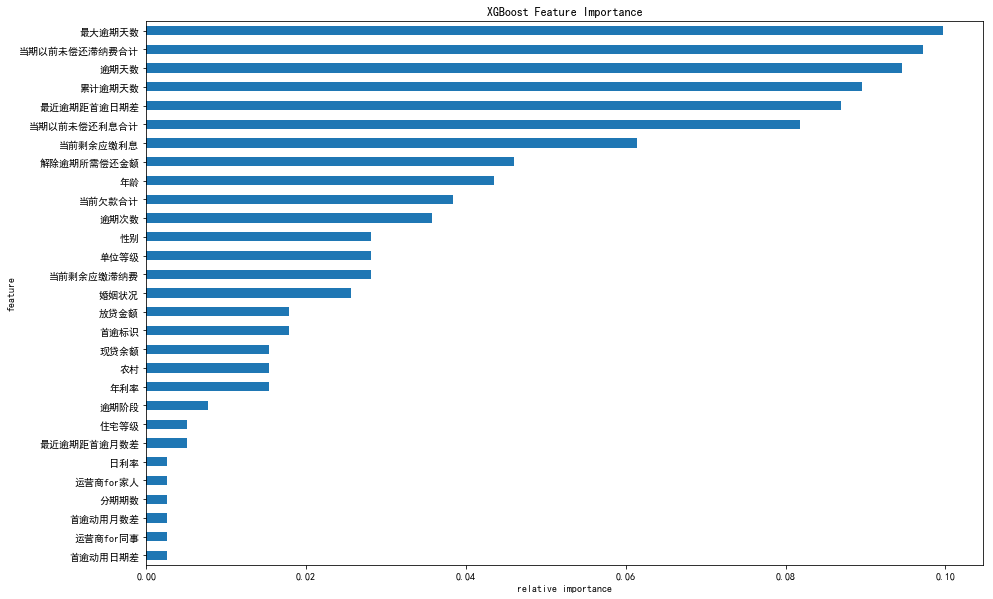

In [127]:
import operator  
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
arr=train_xy.drop(['flag'],axis=1).columns.values#,'批次','证件号码','交易金额','消费金融账号'
def create_feature_map(features):  
    outfile = open('xgb.fmap', 'w',encoding='UTF-8')  
    i = 0  
    for feat in features: 
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))  
        i = i + 1  
    outfile.close()
create_feature_map(arr)
importance = model.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature','fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()  
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(15, 10))  
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')  
plt.savefig('2018-10-24 without weight.png')
plt.show()

In [90]:
model.save_model('good.model')

In [21]:
model.dump_model("model.txt")

In [52]:
#pfile = pd.DataFrame(preds)
#pfile = pfile+0.5
(pfile[319+8819+9374:]).to_excel('out.xlsx',index=False)

In [46]:
import codecs  
f = codecs.open('xgb_tree.png', mode='wb') 
g = xgb.to_graphviz(model,num_trees=99)
f.write(g.pipe('png'))
f.close()

In [28]:
preds1=model.predict(xgb.DMatrix(train0[['中银微贷款', '住宅等级', '农村', '分期期数', '单位名称', '单位等级', '商户地址', '婚姻状况', '年利率', '年龄', '开户动用日期差', '开户动用月数差', '当前剩余应缴利息', '当前剩余应缴滞纳费', '当前欠款合计', '当期以前未偿还利息合计', '当期以前未偿还滞纳费合计', '性别', '户籍等级', '放贷金额', '教育程度', '新易贷-微贷款-一点即用', '新易贷-微贷款-乐贷款', '新易贷-微贷款-京东金融', '新易贷-微贷款-友圈贷', '新易贷-微贷款-小牛速贷', '新易贷-微贷款-微易贷', '新易贷-微贷款-摩尔龙', '日利率', '最大逾期天数', '最近逾期距首逾日期差', '最近逾期距首逾月数差', '现贷余额', '第二联系人与客户关系', '累计逾期天数', '联系人与客户关系', '解除逾期所需偿还金额', '运营商for同事', '运营商for家人', '运营商for本人', '逾期天数', '逾期次数', '逾期阶段', '首逾动用日期差', '首逾动用月数差', '首逾标识']]))

In [29]:
print(pd.DataFrame(preds1).describe())

                  0
count  39248.000000
mean       0.018028
std        0.020664
min       -0.002502
25%        0.006115
50%        0.010941
75%        0.021254
max        0.505284


In [30]:
train0.insert(0,'preds',pd.DataFrame(preds1))
true = train0[(train0['交易金额']>=0.1*train0['当前欠款合计'])]
print(len(true))
print(len(true[true['preds']>= 0.010941]))
train0 = train0.drop(['preds'],axis=1)
#train2 = train2.drop(['preds'],axis=1)

881
770


In [72]:
model.save_model('1&2&3&4&5data.model')